## **Dataset**

In [1]:
!gdown 1JJjMiNieTz7xYs6UeVqd02M3DW4fnEfU

Downloading...
From (original): https://drive.google.com/uc?id=1JJjMiNieTz7xYs6UeVqd02M3DW4fnEfU
From (redirected): https://drive.google.com/uc?id=1JJjMiNieTz7xYs6UeVqd02M3DW4fnEfU&confirm=t&uuid=f566f471-3996-4635-9419-19af17fcfa1b
To: e:\OneDrive\1.0 DS & AI\AIO2024\AIO-Exercise\Module_09\Week_02\cvpr2016_flowers.zip

  0%|          | 0.00/351M [00:00<?, ?B/s]
  0%|          | 524k/351M [00:00<02:25, 2.41MB/s]
  0%|          | 1.57M/351M [00:00<01:03, 5.52MB/s]
  1%|          | 3.15M/351M [00:00<00:42, 8.19MB/s]
  1%|▏         | 4.72M/351M [00:00<00:36, 9.56MB/s]
  2%|▏         | 6.29M/351M [00:00<00:33, 10.4MB/s]
  2%|▏         | 7.86M/351M [00:00<00:31, 10.8MB/s]
  3%|▎         | 9.44M/351M [00:00<00:30, 11.2MB/s]
  3%|▎         | 11.0M/351M [00:01<00:29, 11.4MB/s]
  4%|▎         | 12.6M/351M [00:01<00:29, 11.5MB/s]
  4%|▍         | 14.2M/351M [00:01<00:29, 11.6MB/s]
  4%|▍         | 15.7M/351M [00:01<00:28, 11.7MB/s]
  5%|▍         | 17.3M/351M [00:01<00:28, 11.7MB/s]
  5%|▌      

In [2]:
!tar -xf cvpr2016_flowers.zip

In [3]:
import os

def load_captions(captions_folder, image_folder):
    captions = {}
    image_files = os.listdir(image_folder)
    for image_file in image_files:
        image_name = image_file.split('.')[0]
        caption_file = os.path.join(captions_folder, image_name + ".txt")
        with open(caption_file, "r") as f:
            caption = f.readlines()[0].strip()
        if image_name not in captions:
                captions[image_name] = caption
    return captions

In [4]:
captions_folder = "./content/cvpr2016_flowers/captions"
image_folder = "./content/cvpr2016_flowers/images"

captions = load_captions(captions_folder, image_folder)

In [5]:
captions['image_01313']

'flower with multiple white petals peeling back from the center.'

## **Caption Encoder**

In [7]:
import torch
import numpy as np
from sentence_transformers import SentenceTransformer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

bert_model = SentenceTransformer("all-mpnet-base-v2").to(device)

def encode_captions(captions):
    encoded_captions = {}
    for image_name in captions.keys():
        caption = captions[image_name]
        encoded_captions[image_name] = {
            'embed': torch.tensor(bert_model.encode(caption)),
            'text': caption
        }
    return encoded_captions

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\tienn\anaconda3\envs\torchEnv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tienn\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
bert_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [9]:
encoded_captions = encode_captions(captions)

In [10]:
encoded_captions['image_01313']

{'embed': tensor([ 8.2321e-04, -2.2503e-02, -3.8771e-02,  3.4367e-02, -4.0684e-02,
          9.5354e-03,  3.5113e-02,  3.6865e-02,  6.1961e-02, -9.9160e-03,
          1.1047e-01, -6.6033e-02, -4.7555e-02, -2.5872e-03,  1.5864e-02,
         -2.2544e-02, -7.4908e-03,  1.5508e-02,  6.6533e-02, -3.1364e-02,
          6.6394e-03, -6.6745e-03, -8.4943e-03,  5.8506e-02,  2.8159e-02,
         -6.8209e-02, -3.1168e-02, -3.1902e-02,  1.8016e-02, -2.0944e-02,
          2.8717e-02, -1.7579e-02, -2.6495e-02, -5.7450e-02,  1.3396e-06,
         -3.5225e-02, -1.3897e-02, -3.4884e-03, -7.0081e-03, -2.1350e-02,
         -4.1457e-02, -2.2456e-02,  7.4699e-03,  2.5690e-02,  3.6534e-02,
          1.3188e-02, -1.6613e-02,  7.3492e-02,  8.9742e-03,  4.4904e-02,
          3.7980e-02, -2.5769e-02, -1.0529e-02,  2.7776e-02,  1.9198e-02,
          2.2026e-02,  1.8606e-02, -9.8877e-02, -1.2130e-01, -8.1141e-02,
         -1.5998e-02, -5.0306e-03, -3.2131e-02, -6.8181e-02, -5.1315e-02,
          3.8415e-03, -2.5069

## **Preprocessing**

In [11]:
from PIL import Image
from torch.utils.data import Dataset

class FlowerDataset(Dataset):
    def __init__(self, img_dir, captions, transform=None):
        self.img_dir = img_dir
        self.transform = transform

        # Load captions
        self.captions = captions

        self.img_names = list(self.captions.keys())

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_name = self.img_names[idx]
        img_path = os.path.join(self.img_dir, img_name+".jpg")
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        encoded_caption = self.captions[img_name]['embed']
        caption = self.captions[img_name]['text']

        return {
            'image': image,
            'embed_caption': encoded_caption,
            'text': caption
        }

In [12]:
import torchvision.transforms as transforms

IMG_SIZE = 128

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

ds = FlowerDataset(
    img_dir="./content/cvpr2016_flowers/images",
    captions=encoded_captions,
    transform=transform
)

In [13]:
import matplotlib.pyplot as plt

def show_grid(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


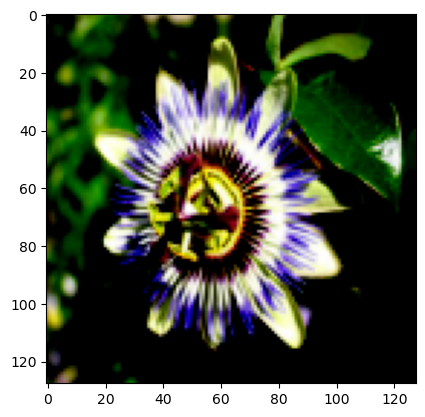

In [14]:
show_grid(next(iter(ds))['image'])

In [47]:
from torch.utils.data import DataLoader

BATCH_SIZE =512
dataloader = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True)

In [48]:
batch_sample = next(iter(dataloader))

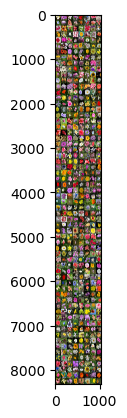

In [49]:
import torchvision

show_grid(torchvision.utils.make_grid(batch_sample['image'], normalize=True))

## **Model**

In [50]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, noise_size, feature_size, num_channels, embedding_size, reduced_dim_size):
        super(Generator, self).__init__()
        self.reduced_dim_size = reduced_dim_size

        # 768 --> 256
        self.textEncoder = nn.Sequential(
            nn.Linear(in_features=embedding_size, out_features=reduced_dim_size),
            nn.BatchNorm1d(num_features=reduced_dim_size),
            nn.LeakyReLU(negative_slope=0.2, inplace=True)
        )

        self.upsamplingBlock = nn.Sequential(
            # 256+100 --> 1024
            nn.ConvTranspose2d(noise_size + reduced_dim_size, feature_size * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_size * 8),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            # 1024 --> 512
            nn.ConvTranspose2d(feature_size * 8, feature_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 4),
            nn.ReLU(True),

            # 512 --> 256
            nn.ConvTranspose2d(feature_size * 4, feature_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 2),
            nn.ReLU(True),

            # 256 --> 128
            nn.ConvTranspose2d(feature_size * 2, feature_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size),
            nn.ReLU(True),

            # 128 --> 128
            nn.ConvTranspose2d(feature_size, feature_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size),
            nn.ReLU(True),

            # 128 --> 3
            nn.ConvTranspose2d(feature_size, num_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, noise, text_embeddings):
        encoded_text = self.textEncoder(text_embeddings)
        concat_input = torch.cat([noise, encoded_text], dim=1).unsqueeze(2).unsqueeze(2)
        output = self.upsamplingBlock(concat_input)
        return output

In [51]:
generator = Generator(100, 128, 3, 768, 256).to(device)

In [52]:
generator

Generator(
  (textEncoder): Sequential(
    (0): Linear(in_features=768, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (upsamplingBlock): Sequential(
    (0): ConvTranspose2d(356, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), str

In [53]:
class Discriminator(nn.Module):
    def __init__(self, num_channels, feature_size, embedding_size, reduced_dim_size):
        super(Discriminator, self).__init__()
        self.reduced_dim_size = reduced_dim_size

        self.imageEncoder = nn.Sequential(  # 3 -> 128
            nn.Conv2d(num_channels, feature_size, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # 128 -> 128
            nn.Conv2d(feature_size, feature_size, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # 128 -> 256
            nn.Conv2d(feature_size, feature_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # 256 -> 512
            nn.Conv2d(feature_size * 2, feature_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # 512 -> 1024
            nn.Conv2d(feature_size * 4, feature_size * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 8),
            nn.LeakyReLU(0.2, inplace=True)
        )

        self.textEncoder = nn.Sequential(
            nn.Linear(in_features=embedding_size, out_features=reduced_dim_size),
            nn.BatchNorm1d(num_features=reduced_dim_size),
            nn.LeakyReLU(negative_slope=0.2, inplace=True)
        )

        self.finalBlock = nn.Sequential(
            nn.Conv2d(feature_size * 8 + reduced_dim_size, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input_img, text_embeddings):
        image_encoded = self.imageEncoder(input_img)
        text_encoded = self.textEncoder(text_embeddings)
        replicated_text = text_encoded.repeat(4, 4, 1, 1).permute(2, 3, 0, 1)
        concat_layer = torch.cat([image_encoded, replicated_text], 1)
        x = self.finalBlock(concat_layer)
        return x.view(-1, 1)

In [54]:
discriminator = Discriminator(3, 128, 768, 256).to(device)

In [55]:
discriminator

Discriminator(
  (imageEncoder): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace=True)
    (7): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negati

## **Training**

In [56]:
bce_loss = nn.BCELoss()
l2_loss = nn.MSELoss()
l1_loss = nn.L1Loss()

In [57]:
plt_o_text_embeddings = ds[0]['embed_caption'].unsqueeze(0)
plt_o_text_embeddings.shape

torch.Size([1, 768])

In [58]:
fixed_noise = torch.randn(size=(1, 100))
fixed_noise.shape

torch.Size([1, 100])

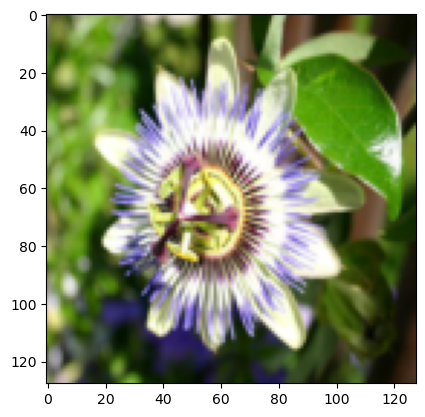

In [59]:
import torchvision

show_grid(torchvision.utils.make_grid(ds[0]['image'], normalize=True))

In [60]:
def plot_output(generator):
  plt.clf()
  with torch.no_grad():

    generator.eval()
    test_images = generator(fixed_noise.to(device), plt_o_text_embeddings.to(device))
    generator.train()

    grid = torchvision.utils.make_grid(test_images.cpu(), normalize=True)
    show_grid(grid)

In [61]:
import torch.optim as optim

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

Epoch [1/500] Loss_D: 1.7730, Loss_G: 0.5697, Time: 54.24
Epoch [2/500] Loss_D: 1.8316, Loss_G: 1.1515, Time: 51.02
Epoch [3/500] Loss_D: 0.6413, Loss_G: 0.2792, Time: 51.36
Epoch [4/500] Loss_D: 0.4871, Loss_G: 0.2091, Time: 50.53
Epoch [5/500] Loss_D: 1.4154, Loss_G: 0.7270, Time: 51.59
Epoch [6/500] Loss_D: 1.4865, Loss_G: 0.8800, Time: 50.79
Epoch [7/500] Loss_D: 1.1968, Loss_G: 0.6142, Time: 50.90
Epoch [8/500] Loss_D: 1.2287, Loss_G: 0.6672, Time: 51.19
Epoch [9/500] Loss_D: 0.8642, Loss_G: 0.4307, Time: 51.22
Epoch [10/500] Loss_D: 1.1630, Loss_G: 0.6397, Time: 50.38
Epoch [11/500] Loss_D: 1.0150, Loss_G: 0.5238, Time: 50.71
Epoch [12/500] Loss_D: 0.9552, Loss_G: 0.5049, Time: 50.78
Epoch [13/500] Loss_D: 1.1997, Loss_G: 0.6227, Time: 51.17
Epoch [14/500] Loss_D: 1.2461, Loss_G: 0.7060, Time: 50.42
Epoch [15/500] Loss_D: 1.2554, Loss_G: 0.6547, Time: 49.73
Epoch [16/500] Loss_D: 0.9515, Loss_G: 0.4874, Time: 48.83
Epoch [17/500] Loss_D: 1.0923, Loss_G: 0.5669, Time: 48.96
Epoch 

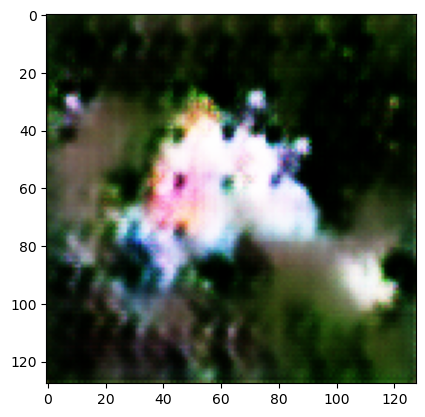

Epoch [100/500] Loss_D: 0.8999, Loss_G: 0.4582, Time: 49.11
Epoch [101/500] Loss_D: 0.8810, Loss_G: 0.4655, Time: 48.89
Epoch [102/500] Loss_D: 0.9958, Loss_G: 0.4945, Time: 49.20
Epoch [103/500] Loss_D: 0.9026, Loss_G: 0.4727, Time: 48.58
Epoch [104/500] Loss_D: 0.9365, Loss_G: 0.4706, Time: 48.38
Epoch [105/500] Loss_D: 0.8939, Loss_G: 0.4733, Time: 48.78
Epoch [106/500] Loss_D: 0.8127, Loss_G: 0.4388, Time: 48.38
Epoch [107/500] Loss_D: 0.9294, Loss_G: 0.4249, Time: 48.57
Epoch [108/500] Loss_D: 0.8999, Loss_G: 0.4830, Time: 48.61
Epoch [109/500] Loss_D: 0.9512, Loss_G: 0.4947, Time: 48.58
Epoch [110/500] Loss_D: 1.0169, Loss_G: 0.5326, Time: 48.96
Epoch [111/500] Loss_D: 0.8162, Loss_G: 0.3868, Time: 48.21
Epoch [112/500] Loss_D: 1.1683, Loss_G: 0.6172, Time: 48.59
Epoch [113/500] Loss_D: 0.8054, Loss_G: 0.4121, Time: 49.17
Epoch [114/500] Loss_D: 1.0161, Loss_G: 0.5370, Time: 48.73
Epoch [115/500] Loss_D: 0.9389, Loss_G: 0.5037, Time: 48.99
Epoch [116/500] Loss_D: 0.8103, Loss_G: 

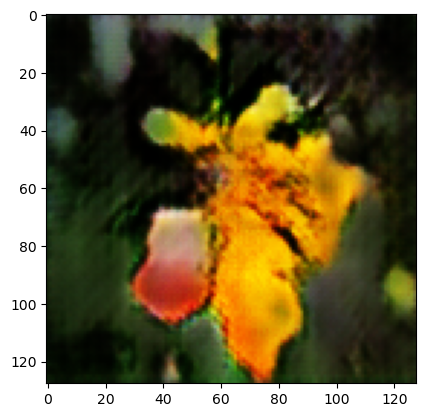

Epoch [200/500] Loss_D: 0.8174, Loss_G: 0.4244, Time: 48.74
Epoch [201/500] Loss_D: 0.8566, Loss_G: 0.4519, Time: 49.45
Epoch [202/500] Loss_D: 0.9258, Loss_G: 0.4719, Time: 48.94
Epoch [203/500] Loss_D: 0.8191, Loss_G: 0.4278, Time: 49.02
Epoch [204/500] Loss_D: 0.8914, Loss_G: 0.4810, Time: 49.35
Epoch [205/500] Loss_D: 0.9386, Loss_G: 0.4853, Time: 49.81
Epoch [206/500] Loss_D: 1.0697, Loss_G: 0.5360, Time: 48.74
Epoch [207/500] Loss_D: 0.8687, Loss_G: 0.4256, Time: 49.22
Epoch [208/500] Loss_D: 0.9821, Loss_G: 0.5287, Time: 49.40
Epoch [209/500] Loss_D: 0.8565, Loss_G: 0.4272, Time: 49.91
Epoch [210/500] Loss_D: 0.7508, Loss_G: 0.4082, Time: 49.62
Epoch [211/500] Loss_D: 1.0578, Loss_G: 0.5370, Time: 50.02
Epoch [212/500] Loss_D: 0.7816, Loss_G: 0.3974, Time: 48.38
Epoch [213/500] Loss_D: 0.8898, Loss_G: 0.4556, Time: 48.58
Epoch [214/500] Loss_D: 0.8772, Loss_G: 0.4508, Time: 48.59
Epoch [215/500] Loss_D: 0.8899, Loss_G: 0.4789, Time: 48.34
Epoch [216/500] Loss_D: 0.8840, Loss_G: 

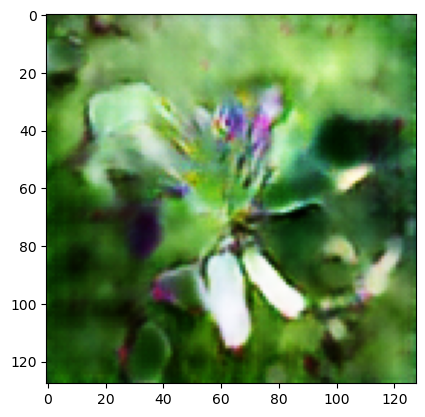

Epoch [300/500] Loss_D: 0.8157, Loss_G: 0.4081, Time: 48.74
Epoch [301/500] Loss_D: 0.7280, Loss_G: 0.3846, Time: 48.62
Epoch [302/500] Loss_D: 0.8661, Loss_G: 0.4645, Time: 48.20
Epoch [303/500] Loss_D: 0.7960, Loss_G: 0.3820, Time: 48.57
Epoch [304/500] Loss_D: 0.8979, Loss_G: 0.4631, Time: 48.77
Epoch [305/500] Loss_D: 0.7479, Loss_G: 0.4026, Time: 48.44
Epoch [306/500] Loss_D: 0.8486, Loss_G: 0.4282, Time: 48.59
Epoch [307/500] Loss_D: 0.9363, Loss_G: 0.4690, Time: 48.58
Epoch [308/500] Loss_D: 0.8344, Loss_G: 0.4813, Time: 48.39
Epoch [309/500] Loss_D: 0.8699, Loss_G: 0.4316, Time: 48.15
Epoch [310/500] Loss_D: 0.8342, Loss_G: 0.4165, Time: 48.35
Epoch [311/500] Loss_D: 0.7618, Loss_G: 0.3939, Time: 48.84
Epoch [312/500] Loss_D: 0.6731, Loss_G: 0.3534, Time: 48.76
Epoch [313/500] Loss_D: 0.8692, Loss_G: 0.4425, Time: 48.21
Epoch [314/500] Loss_D: 0.7237, Loss_G: 0.3716, Time: 48.79
Epoch [315/500] Loss_D: 0.8042, Loss_G: 0.4022, Time: 48.33
Epoch [316/500] Loss_D: 0.7790, Loss_G: 

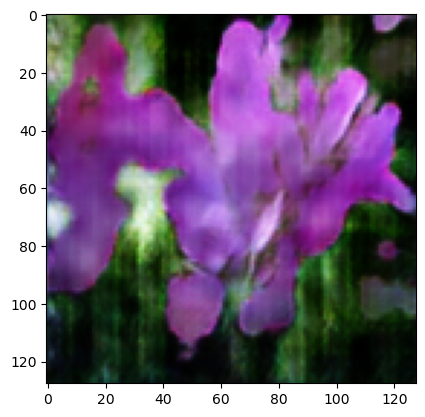

Epoch [400/500] Loss_D: 0.6582, Loss_G: 0.3418, Time: 49.86
Epoch [401/500] Loss_D: 0.6257, Loss_G: 0.3395, Time: 48.04
Epoch [402/500] Loss_D: 0.6918, Loss_G: 0.3556, Time: 48.18
Epoch [403/500] Loss_D: 0.7287, Loss_G: 0.3522, Time: 48.18
Epoch [404/500] Loss_D: 0.5686, Loss_G: 0.2981, Time: 48.24
Epoch [405/500] Loss_D: 0.8008, Loss_G: 0.4223, Time: 48.14
Epoch [406/500] Loss_D: 0.5472, Loss_G: 0.2803, Time: 48.60
Epoch [407/500] Loss_D: 0.6741, Loss_G: 0.3562, Time: 48.42
Epoch [408/500] Loss_D: 0.9074, Loss_G: 0.4642, Time: 48.37
Epoch [409/500] Loss_D: 0.6050, Loss_G: 0.3174, Time: 48.20
Epoch [410/500] Loss_D: 0.5829, Loss_G: 0.2897, Time: 48.36
Epoch [411/500] Loss_D: 0.7518, Loss_G: 0.3748, Time: 48.57
Epoch [412/500] Loss_D: 0.5740, Loss_G: 0.3090, Time: 49.23
Epoch [413/500] Loss_D: 0.6808, Loss_G: 0.3510, Time: 48.38
Epoch [414/500] Loss_D: 0.6426, Loss_G: 0.3379, Time: 48.16
Epoch [415/500] Loss_D: 0.6333, Loss_G: 0.3323, Time: 48.43
Epoch [416/500] Loss_D: 0.5480, Loss_G: 

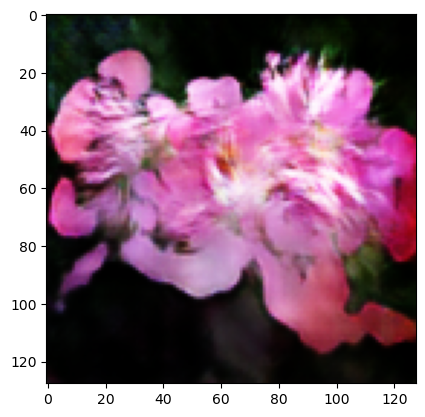

Epoch [500/500] Loss_D: 0.5007, Loss_G: 0.2696, Time: 48.69


NameError: name 'model_save_path' is not defined

In [62]:
import time

epochs = 500

for epoch in range(epochs):
    d_losses, g_losses = [], []
    epoch_time = time.time()

    for batch in dataloader:
        images = batch["image"].to(device)
        embed_captions = batch["embed_caption"].to(device)

        # Labels
        real_labels = torch.ones(images.size(0), 1, device=device)
        fake_labels = torch.zeros(images.size(0), 1, device=device)

        # Training the discriminator
        optimizer_D.zero_grad()

        # Generate fake images
        noise = torch.randn(images.size(0), 100, device=device)
        fake_images = generator(noise, embed_captions)

        # Compute real loss
        real_loss = criterion(
            discriminator(images, embed_captions),
            real_labels
        )

        # Compute fake loss
        fake_loss = criterion(
            discriminator(fake_images.detach(), embed_captions),
            fake_labels
        )

        d_loss = real_loss + fake_loss

        # Update weights
        d_loss.backward()
        optimizer_D.step()
        d_losses.append(d_loss.item())

        # Training generator
        optimizer_G.zero_grad()

        noise = torch.randn(images.size(0), 100, device=device)
        fake_images = generator(noise, embed_captions)

        # Compute loss
        g_loss = criterion(
            discriminator(fake_images, embed_captions),
            real_labels
        )
        g_loss.backward()
        optimizer_G.step()

        g_losses.append(real_loss.item())

    avg_d_loss = sum(d_losses) / len(d_losses)
    avg_g_loss = sum(g_losses) / len(g_losses)

    if (epoch + 1) % 100 == 0:
        plot_output(generator)

    print("Epoch [{}/{}] Loss_D: {:.4f}, Loss_G: {:.4f}, Time: {:.2f}".format(
        epoch + 1,
        epochs,
        avg_d_loss,
        avg_g_loss,
        time.time() - epoch_time))

## **Prediction**

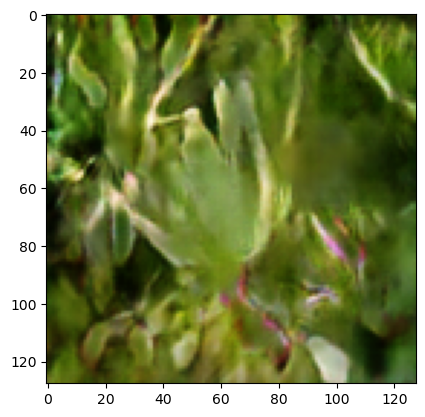

In [65]:
generator.eval()

noise = torch.randn(size=(1, 100))
text_embedding = ds[10]['embed_caption'].unsqueeze(0)

with torch.no_grad():
    test_images = generator(noise.to(device), text_embedding.to(device))
grid = torchvision.utils.make_grid(test_images.cpu(), normalize=True)
show_grid(grid)

In [66]:
import torch

# Save generator
torch.save(generator.state_dict(), 'generator.pth')

# Save discriminator
torch.save(discriminator.state_dict(), 'discriminator.pth')